# Pandas - Very Brief Introduction for Data Exploration


In a Machine Learning (ML) project often we get data from CSV/TSV files. Pandas is a convenient tool to load data, process & analyze it before using the data for training a ML model.

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. Pandas stands for **Python Data Analysis Library**. It is built on top of the Python programming language.  

Using pandas we can load data from CSV/TSV files. It converts the data into a Python object called data frame. The object has rows and columns representing the samples and features, respectively.

To train a ML model, we need to convert the pandas data frame object into arrays (NumPy array): data matrix and one-dimensional target array. But before we do that, we need to do some data processing and exploration.

In this notebook, we load a small dataset stored in a CSV file as a pandas data frame object. Then, we perform basic data exploration.

- Get information on the features (columns)
- Check	categorical features
- One-hot encode categorical features
- Check NaN values
- Data cleaning (remove/replace missing values)
- Compute feature correlation with the target
- Visualize feature correlation
- Select subset of columns
- Convert data frame objects into arrays

See the following link to learn about pandas' methods:
https://pandas.pydata.org/


## Load a CSV File as a Pandas Data Frame Object

We use pandas "read_csv" method to load the CSV file as data frame object. In most of the cases, we only need to pass the file path as the first argument.

Another argument is "header", which could be useful in some cases. By dafault, header=0. In this case, the read_csv method infers the column names from the first line of the file. Alternatively, column names can be passed explicitly, then the behavior is identical to header=None. 

For a full list of the arguments of the read_csv method see:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd

# df = pd.DataFrame({'Bedrooms': [2, 3, 1, 0, 3, 2, 2, 0], 
#                    'Backyard': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No'],
#                    'Number of Schools': [0, 0, 3, 0, 3, 3, 0, 1],
#                    'Price' : [150, 250, 100, None, 220, 135, 140, 0]
#                   })


df = pd.read_csv('/Users/hasan/datasets/DataScienceRepository/Housing_small.csv', header=0)
df

,Bedrooms,Backyard,Nearby Schools,Price
0,2,Yes,0,150.0
1,3,Yes,0,250.0
2,1,No,3,100.0
3,0,No,0,NaN
4,3,Yes,3,220.0
5,2,Yes,3,135.0
6,2,Yes,0,140.0
7,0,No,1,0.0


## Get Information on the Pandas Data Frame Object

Use pandas info method to print information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [2]:
print("Dimension of the data: ", df.shape)

df.info()

Dimension of the data:  (8, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Bedrooms          8 non-null int64
Backyard          8 non-null object
Nearby Schools    8 non-null int64
Price             7 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 336.0+ bytes


## Check the Column Datatype

There are two types of columns.
- Numeric features
- Categorical features (data type is object)

Use the dtype attribute to get the data type of a column.

In [3]:
print(df["Bedrooms"].dtype)
print(df["Backyard"].dtype)
print(df["Price"].dtype)

int64
object
float64


## One-Hot Encode the Categorical Feature Columns

Use the get_dummies method to convert categorical variable into dummy/indicator variables.

In [4]:
# Select only categorical variables
category_df = df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

dummy_df

,Backyard_No,Backyard_Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,1,0


## Combine the One-hot Coded Categorical Features with the Numerical Features

In [5]:
df = pd.get_dummies(df)
df

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,2,0,150.0,0,1
1,3,0,250.0,0,1
2,1,3,100.0,1,0
3,0,0,NaN,1,0
4,3,3,220.0,0,1
5,2,3,135.0,0,1
6,2,0,140.0,0,1
7,0,1,0.0,1,0


## Check Whether the Data Frame Cell Values are Null or Not-Null

To detect NaN values, use either .isna() or .isnull().

It will display True/False for **all cells** in the data frame.

In [6]:
df.isna()

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False


## Check if there are any null values in any column

The above technique to detect NaN values is inefficient for large files. We may use the following technique instead.

In [7]:
#df.isnull().values.any()
df.isna().values.any()

True

## Data Cleaning

We need to clean the missing features, otherwise the ML algorithms won’t work. By "missing" we simply mean NA ("not available") or "not present for whatever reason". Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. 

- The NaN is the default missing value marker.

There are three techniques to clean data:



- Drop the "NA" Missing Feature Values
- Drop the "Non-NA" Missing Feature Values
- Replce the Missing Feature Values



## Drop the "NA" Missing Feature Values

We exclude labels from a data set which refer to missing data (NA).

To do this, we use DataFrame's dropna() method.

- To drop the row with missing values, set the "axis" attribute to the value 0
- To drop the column with missing values, set the "axis" attribute to the value 1


In [8]:
# Make a deep copy of the data frame object
df_copy = df.copy()

# Remove the row with missing values 
df_copy = df_copy.dropna(axis=0)

df_copy

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,2,0,150.0,0,1
1,3,0,250.0,0,1
2,1,3,100.0,1,0
4,3,3,220.0,0,1
5,2,3,135.0,0,1
6,2,0,140.0,0,1
7,0,1,0.0,1,0


## Non-contiguous Indexing

After removing some rows, the indexing will not be contiguous. To create contiguous indexing, use the following method:
- reset_index(inplace=True, drop=True) 

In [9]:
df_copy.reset_index(inplace=True, drop=True) 
df_copy

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,2,0,150.0,0,1
1,3,0,250.0,0,1
2,1,3,100.0,1,0
3,3,3,220.0,0,1
4,2,3,135.0,0,1
5,2,0,140.0,0,1
6,0,1,0.0,1,0


## Drop the "Non-NA" Missing Feature Values

Sometimes we consider some values (other than NA) as "missing" values.

For this demo, the value "0" in the target column could be considered as a missing value. 




## Check Whether Each element in the DataFrame Contains Specific Values (e.g., 0)

Use the isin(values) method to check whether the cells contain the "values", such as 0.

In [10]:
df.isin([0])

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,False,True,False,True,False
1,False,True,False,True,False
2,False,False,False,False,True
3,True,True,False,False,True
4,False,False,False,True,False
5,False,False,False,True,False
6,False,True,False,True,False
7,True,False,True,False,True


## Drop the Rows for Which the "Price" Column has 0 Values

In [11]:
df = df[~df['Price'].isin([0])]
df

,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,2,0,150.0,0,1
1,3,0,250.0,0,1
2,1,3,100.0,1,0
3,0,0,NaN,1,0
4,3,3,220.0,0,1
5,2,3,135.0,0,1
6,2,0,140.0,0,1


## Replce the Missing Feature Values

To replace an empty cell with zero values, we will use DataFrame’s fillna() method.

The fillna() method can "fill in" NA (Not Available) or missing values with non-NA data in a couple of ways.

For example, we can fill in the empty cells with 0 values: df["Price"] = df["Price"].fillna(0)

Or, we can fill in the empty cells with median values: median = df["Price"].median() df["Price"] = df["Price"].fillna(median, inplace=True)



In [12]:
df["Price"] = df["Price"].fillna(0)
df

/Users/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Bedrooms,Nearby Schools,Price,Backyard_No,Backyard_Yes
0,2,0,150.0,0,1
1,3,0,250.0,0,1
2,1,3,100.0,1,0
3,0,0,0.0,1,0
4,3,3,220.0,0,1
5,2,3,135.0,0,1
6,2,0,140.0,0,1


## Numerical Correlations with the Target Column

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between the taeget and all features using DataFrame's corr() method.

In [13]:
df.corr()['Price'].sort_values(ascending=False)

Price             1.000000
Bedrooms          0.980431
Backyard_Yes      0.772926
Nearby Schools    0.109393
Backyard_No      -0.772926
Name: Price, dtype: float64

## Visualize the Numerical Correlation

We create a pair plot to visualize the relationships of the features. For this, we use the seaborn pairplot function.

A pairplot provides pairwise relationships of the features in a dataset. The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. 

We also show the Pearson correlation coefficient (Pearson's r) between pairs of features as well as the density plot.

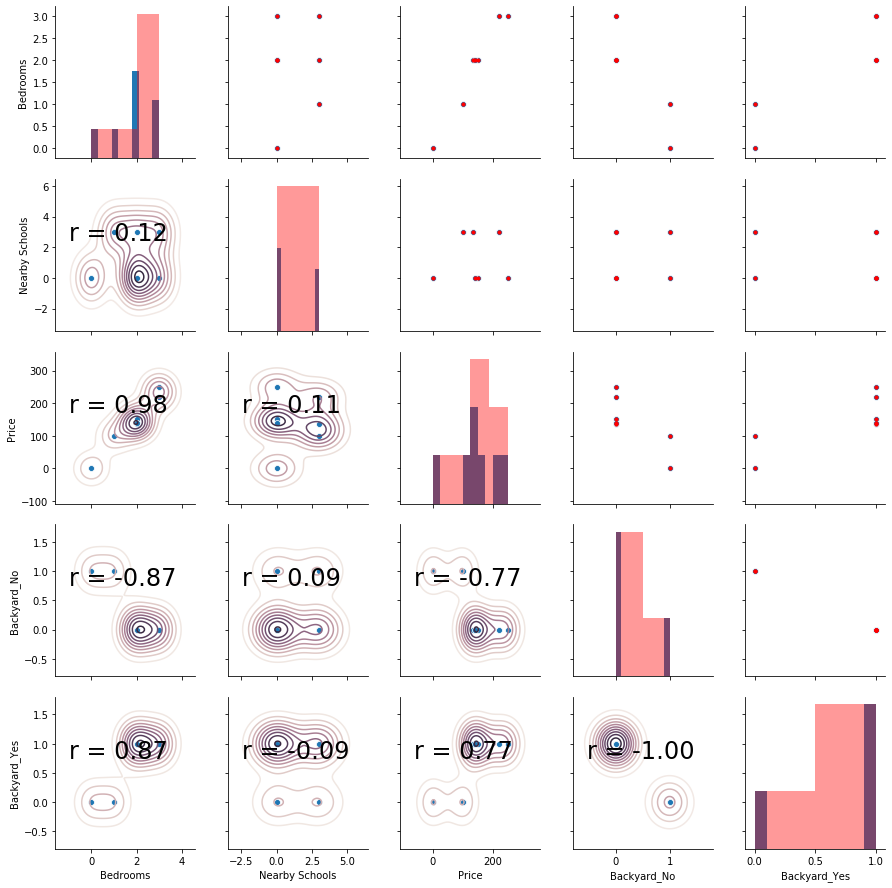

In [14]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair plot
g = sns.pairplot(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

## Select a Subset of the Columns

After analyzing the feature correlation with the target, we may need to drop some features that don't have significant correlation.

For selecting a subset of feature columns from a pandas data frame object, we can **slice** the data frame object.

The pandas offers at least three methods for slicing data: .loc[], .iloc[], and .ix[].

Here is a quick reference:

- .loc[] takes slices based on labels. This means that it will take into account the names or labels of the index when taking slices.

- .iloc[] takes slices based on index’s position. We need to indicate the positional index number to get the appropriate slice.

- .ix[] uses both labels and positions.

## Slice based on labels

Use the .loc[] method.

In [15]:
df_subset1 = df.loc[:, ['Bedrooms', 'Price']]
df_subset1

,Bedrooms,Price
0,2,150.0
1,3,250.0
2,1,100.0
3,0,0.0
4,3,220.0
5,2,135.0
6,2,140.0


## Slice based on Index’s Position

Use the .iloc[] method.

In [16]:
df_subset2 = df.iloc[:, [0, 2]]
df_subset2

,Bedrooms,Price
0,2,150.0
1,3,250.0
2,1,100.0
3,0,0.0
4,3,220.0
5,2,135.0
6,2,140.0


## Create a Scatterplot of the Target Price and a Feature Bedrooms

See various arguments of the Matplotlib's scatter function:

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

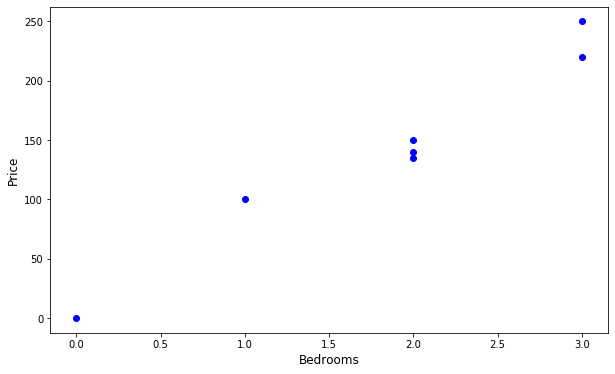

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.scatter(df['Bedrooms'], df['Price'], c="b", marker='o')
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Price", rotation=90, fontsize=12)
plt.show()

## Create a Separate Feature Set (Data Matrix X) and Target (1D Array y)

Create a data matrix (X) that contains all features and a 1D target array (y) containing the price.

First, we create separate data frame objects for X and y. Then, we convert the data frame objects into arrays.

In [18]:
y = df['Price'] # Data frame containing the target 
X = df.drop(columns='Price')  # Data frame containing all features excluding the target

print("Data frame X:")
print(X)
print("\nData frame y:")
print(y)

Data frame X:
   Bedrooms  Nearby Schools  Backyard_No  Backyard_Yes
0         2               0            0             1
1         3               0            0             1
2         1               3            1             0
3         0               0            1             0
4         3               3            0             1
5         2               3            0             1
6         2               0            0             1

Data frame y:
0    150.0
1    250.0
2    100.0
3      0.0
4    220.0
5    135.0
6    140.0
Name: Price, dtype: float64


## Convert X & y into Arrays

Use the NumPy asarray() method to convert the Pandas data frame object X and y into numpy arrays.

In [19]:
import numpy as np

X = np.asarray(X) # Data Matrix containing all features excluding the target
X

array([[2, 0, 0, 1],
       [3, 0, 0, 1],
       [1, 3, 1, 0],
       [0, 0, 1, 0],
       [3, 3, 0, 1],
       [2, 3, 0, 1],
       [2, 0, 0, 1]])

In [20]:
y = np.asarray(y) # 1D target array
y

array([150., 250., 100.,   0., 220., 135., 140.])

## Data Type of X and y

We can check the data type of X and y arrays.

For training ML models, we may need the target data type to be integer. Below we show how to convert the target data type to "int".

In [21]:
print("X Data Type: ", X.dtype)
print("y Data Type: ", y.dtype)

y = y.astype(int)
print("\ny Data Type (after conversion to int): ", y.dtype)

X Data Type:  int64
y Data Type:  float64

y Data Type (after conversion to int):  int64
